In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import tensorflow as tf

from subprocess import check_output
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from sklearn.model_selection import  train_test_split
import time #helper libraries
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from numpy import newaxis

C:\softwares\conda4.8.2-python3.7\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\softwares\conda4.8.2-python3.7\lib\site-packages\numpy\.libs\libopenblas.IPBC74C7KURV7CB2PKT5Z5FNR3SIBV4J.gfortran-win_amd64.dll
C:\softwares\conda4.8.2-python3.7\lib\site-packages\numpy\.libs\libopenblas.noijjg62emaszi6nyurl6jbkm4evbgm7.gfortran-win_amd64.dll
C:\softwares\conda4.8.2-python3.7\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\softwares\conda4.8.2-python3.7\lib\site-packages\numpy\.libs\libopenblas.TXA6YQSD3GCQQC22GEQ54J2UDCXDXHWN.gfortran-win_amd64.dll
  stacklevel=1)
C:\softwares\conda4.8.2-python3.7\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\softwares\conda4.

In [2]:
from keras.models import Sequential
from keras import initializers
from keras.layers import Dropout, Activation, Embedding, Convolution1D, MaxPooling1D, Input, Dense, add, \
                         BatchNormalization, Flatten, Reshape, Concatenate
from keras.layers.recurrent import LSTM, GRU
from keras.callbacks import Callback, ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras.models import Model
from keras.optimizers import Adam, SGD, RMSprop
from keras import regularizers
from keras.utils.vis_utils import plot_model
import re
import os
import os.path as osp
from pathlib import Path

In [3]:
#see explanation -->https://stackoverflow.com/questions/57062456/function-call-stack-keras-scratch-graph-error
#replicate the error by commenting out below block

In [4]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("physical_devices-------------", len(physical_devices))
tf.config.experimental.set_memory_growth(physical_devices[0], True)

physical_devices------------- 1


In [5]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [6]:
from matplotlib import pyplot as plt
%matplotlib inline

In [7]:
data_path = osp.join(os.getcwd(),'Data')
df = pd.read_csv(data_path + '/model.csv')
df = df.drop(['Date','News'],axis=1)

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.values)

In [9]:
df_scale = pd.DataFrame(scaled_features, index=df.index, columns=df.columns)

In [10]:
train_size = int(len(df_scale) * 0.80)
test_size = len(df_scale) - train_size

In [11]:
X = df_scale.drop("cap", axis = 1)
y = df_scale.cap

In [12]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 2)

x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [13]:
trainX = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
testX = np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1]))

In [14]:
trainX.shape

(1986, 1, 8)

In [15]:
#Model

def build_model():
    regressor = Sequential()

    regressor.add(LSTM(units = 25, return_sequences = True, input_shape = (trainX.shape[1], trainX.shape[2])))
    regressor.add(Dropout(0.2))

    # regressor.add(LSTM(units = 50, return_sequences = True))
    # regressor.add(Dropout(0.2))

    # regressor.add(LSTM(units = 50, return_sequences = True))
    # regressor.add(Dropout(0.2))

    regressor.add(LSTM(units = 25))
    regressor.add(Dropout(0.2))

    regressor.add(Dense(units = 1))

    regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
    
    return regressor


In [16]:
# model = build_model()
# print()
# save_best_weights = 'lstm.h5'

# callbacks = [ModelCheckpoint(save_best_weights, monitor='val_loss', save_best_only=True),
#             EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto'),
#             ReduceLROnPlateau(monitor='val_loss', factor=0.2, verbose=1, patience=3)]

# history = model.fit(trainX,
#                     y_train,
#                     batch_size=32,
#                     epochs=100,
#                     validation_split=0.15,
#                     verbose=True,
#                     shuffle=True,
#                     callbacks = callbacks)
# print(model.summary())

In [17]:
model = build_model()
model.fit(trainX, y_train, epochs = 25, batch_size = 64)





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/25
1986/1986 [==============================] - 2s 1ms/step - loss: 0.9559
Epoch 2/25
1986/1986 [==============================] - 0s 130us/step - loss: 0.8508
Epoch 3/25
1986/1986 [==============================] - 0s 133us/step - loss: 0.6923
Epoch 4/25
1986/1986 [==============================] - 0s 134us/step - loss: 0.5445
Epoch 5/25
1986/1986 [==============================] - 0s 136us/step - loss: 0.4560
Epoch 6/25
1986/1986 [==============================] - 0s 133us/step - loss: 0.4285
Epoch 7/25
1986/1986 [==============================] - 0s 132us/step - loss: 0.4166
Epoch 8/25
1986/1986 [==============================] - 0s 135us/step - loss: 0.4091
Epoch 9/25
1986/1986 [==============================] - 0s 135us/step - loss: 0.4161
Epoch 10/25
1986/1986 

In [18]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 1, 25)             3400      
_________________________________________________________________
dropout_1 (Dropout)          (None, 1, 25)             0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 25)                5100      
_________________________________________________________________
dropout_2 (Dropout)          (None, 25)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 26        
Total params: 8,526
Trainable params: 8,526
Non-trainable params: 0
_________________________________________________________________


In [19]:
predicted_stock_price = model.predict(testX).flatten()

In [20]:
predicted_stock_price.shape

(351,)

In [21]:
from sklearn.metrics import median_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse

In [22]:
#mse(y_test, predicted_stock_price)

In [23]:
mae(y_test, predicted_stock_price)

0.31234180547559276

In [24]:
mse(y_test, predicted_stock_price, squared=False)

0.6175426688334564

In [25]:
datapoints = [i for i in range(0,len(y_test))]
main_df = pd.DataFrame.from_dict({'days':datapoints,'test values' :y_test.flatten(),'predicted values' : predicted_stock_price.flatten() })

<Figure size 1152x864 with 0 Axes>

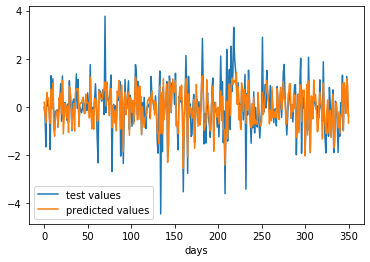

In [26]:
plt.figure().set_size_inches(16,12)
main_df.plot(label='test values',y='test values',x='days')
main_df['predicted values'].plot(label='predicted values')

plt.legend()

In [27]:
model_path = osp.join(os.getcwd(),'Models')

In [28]:
from pickle import dump
dump(scaler, open(model_path + '/lstm-scaler.pkl', 'wb'))

In [29]:
model.save(model_path + '/lstm.h5')